<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> Week 2 </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

## Problem Statement

Features are computed from a image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image.

## About the dataset (Breast Cancer Data) 

**radius:** mean of distances from center to points on the perimeter<br>
**texture:** standard deviation of gray-scale values<br>
**perimeter:** Perimeter<br>
**area:** Area<br>
**smoothness:** local variation in radius lengths<br>
**compactness:** perimeter^2 / area - 1.0<br>
**concavity:** severity of concave portions of the contour<br>
**concave points:** number of concave portions of the contour<br>
**symmetry:** Symmetry<br>
**fractal dimension:** fractal dimension<br>

**Diagnosis:** The cancer is benign or malignant?(Target variable) (M = malignant, B = benign)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Distribution of Variables](#dist)**
    - 2.4 - **[Missing Value Treatment](#null)**

3. **[K Nearest Neighbors (KNN)](#knn)**
    - 3.1 - **[Optimal Value of K (using GridSearchCV)](#hyper)**
4. **[Naive Bayes Algorithm](#NB)**
5. **[Comparison between KNN Model and Naive Bayes Model](#compare)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

 

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [ ]:
df_cancer = pd.read_csv('bcancer.csv')

df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Let us now see the number of variables and observations in the data.**

In [ ]:
df_cancer.shape

(569, 31)

**Interpretation:** The data has 569 observations and 31 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df_cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

**Interpretation:** All the indeppendent variables are numeric.

<a id="dist"></a>
## 2.3 Distribution of Variables

**Distribution of numeric independent variables.**

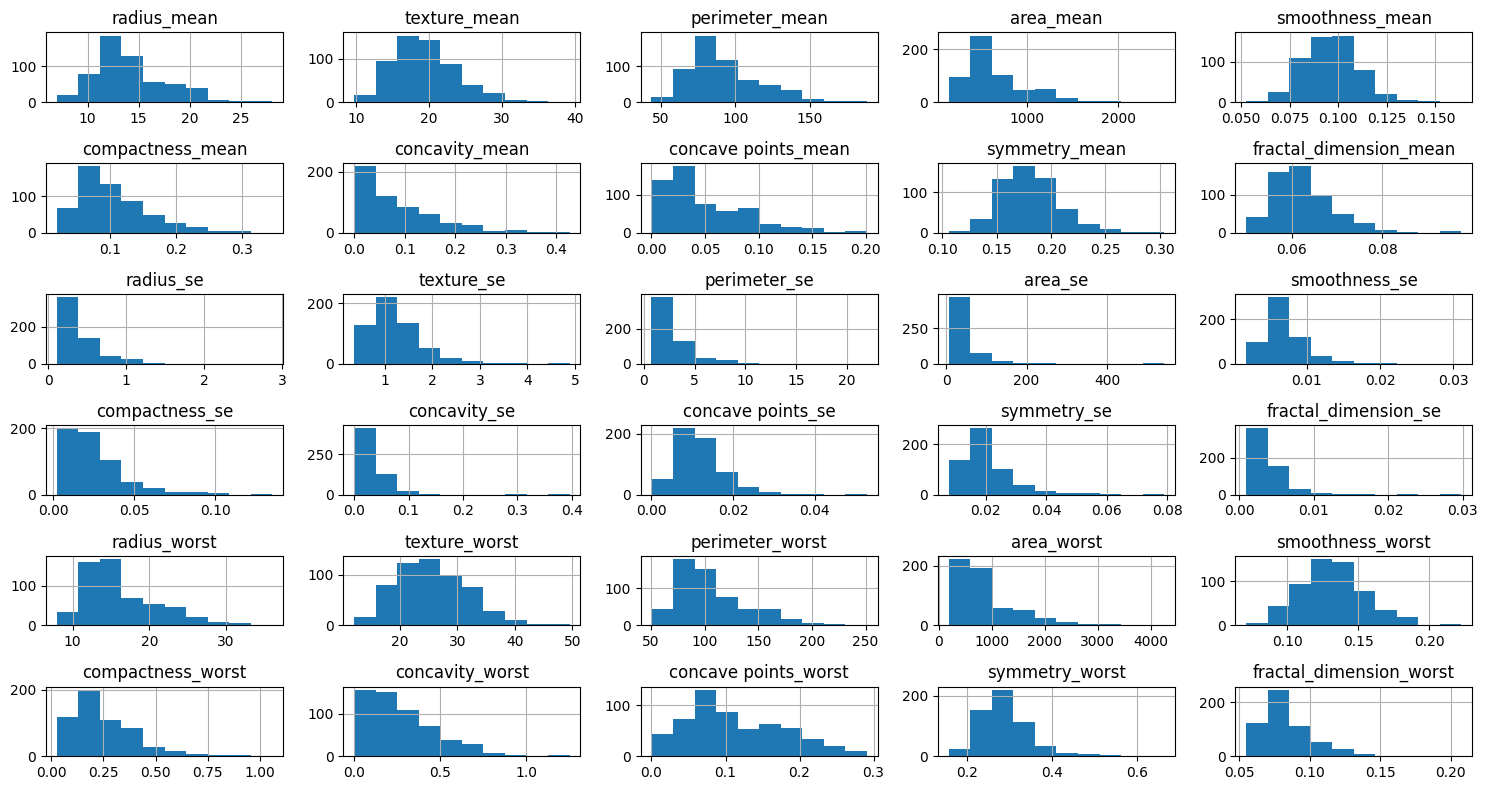

In [ ]:
df_cancer.drop('diagnosis', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

#### Distribution of dependent variable.

In [ ]:
df_cancer['diagnosis'].value_counts(normalize=True) *100



B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

**Interpretation:** The above plot shows that there is not that much imbalance in the target variable.

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [ ]:
(df_cancer.isnull().sum() /df_cancer.index.size) *100 

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

**Interpretation:** The above output shows that there are no missing values in the data.

#### Split the dependent and independent variables.

In [ ]:
# if the value in the target variable is 'B' then replace it with 0 else with 1
# i.e. set 0 for benign (negative class)


for i in range(len(df_cancer['diagnosis'])):
    if df_cancer['diagnosis'][i] == 'B':
        df_cancer['diagnosis'][i] = 0
    else:
        df_cancer['diagnosis'][i] = 1
        
# change the datatype of the target variable to integer
df_cancer['diagnosis'] = df_cancer['diagnosis'].astype('int')

In [ ]:
X= df_cancer.drop('diagnosis',axis=1)
y =df_cancer['diagnosis']

#### Create a generalized function to calculate the performance metrics for the test set.

#### Define a function to plot the confusion matrix.

<a id="knn"></a>
# 3. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

#### Let us normalize the data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# initialize the MinMaxScaler
ms = MinMaxScaler()

scaled_data = ms.fit_transform(X)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(scaled_data, columns = X.columns)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:

# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn= KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn.fit(xtrain, ytrain)

In [ ]:
    # predict the target values using X_test
    ypred = knn_model.predict(xtest)

#### Build a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[75,  0],
       [ 1, 38]])

In [ ]:
cm=confusion_matrix(ytest,ypred)

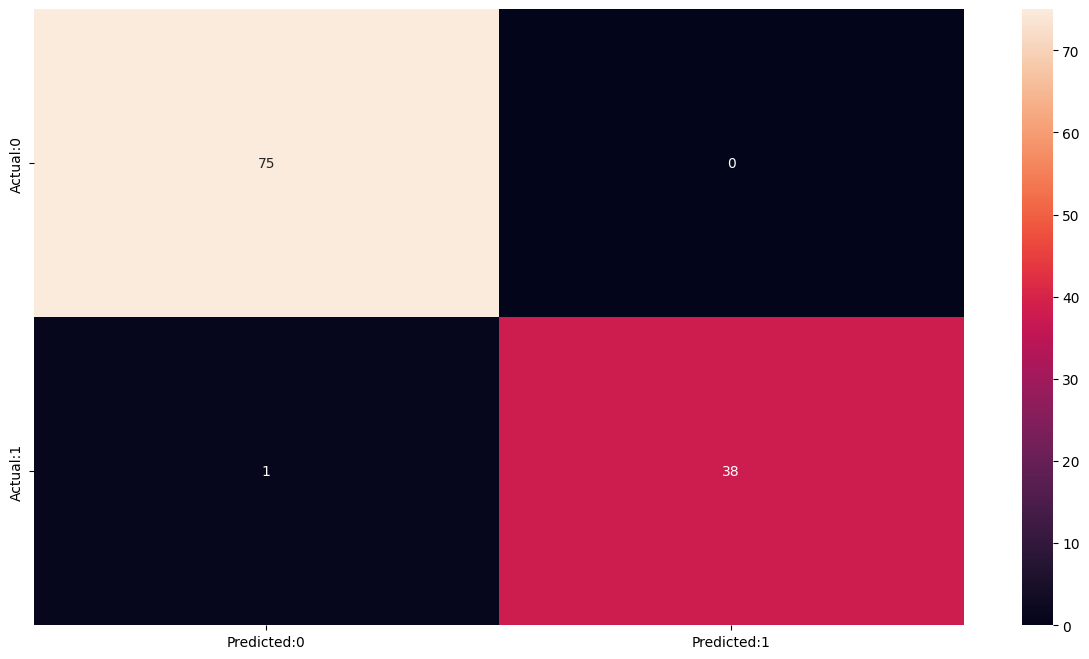

In [ ]:

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

**Calculate performance measures on the test set.**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**Interpretation:** The accuracy is 99% for this model.

**Plot the ROC curve.**

In [ ]:
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    ypred_prob = knn_model.predict_proba(xtest)[:,1]

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
fpr,tpr,threshold =roc_curve(ytest,ypred_prob)

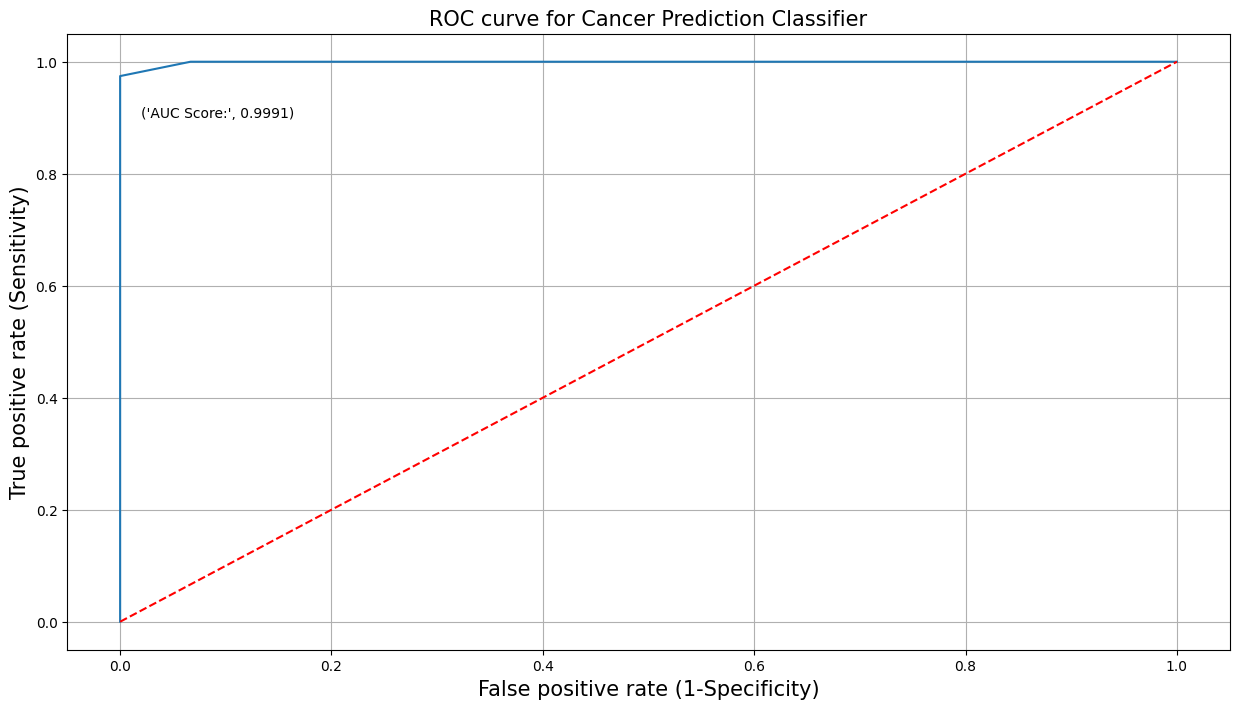

In [ ]:
plt.plot(fpr,tpr)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred_prob),4)))

# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9991.

<a id="hyper"></a>
## 3.1 Optimal Value of K (using GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'



knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 7} 



#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

In [ ]:
from sklearn.model_selection import cross_val_score 

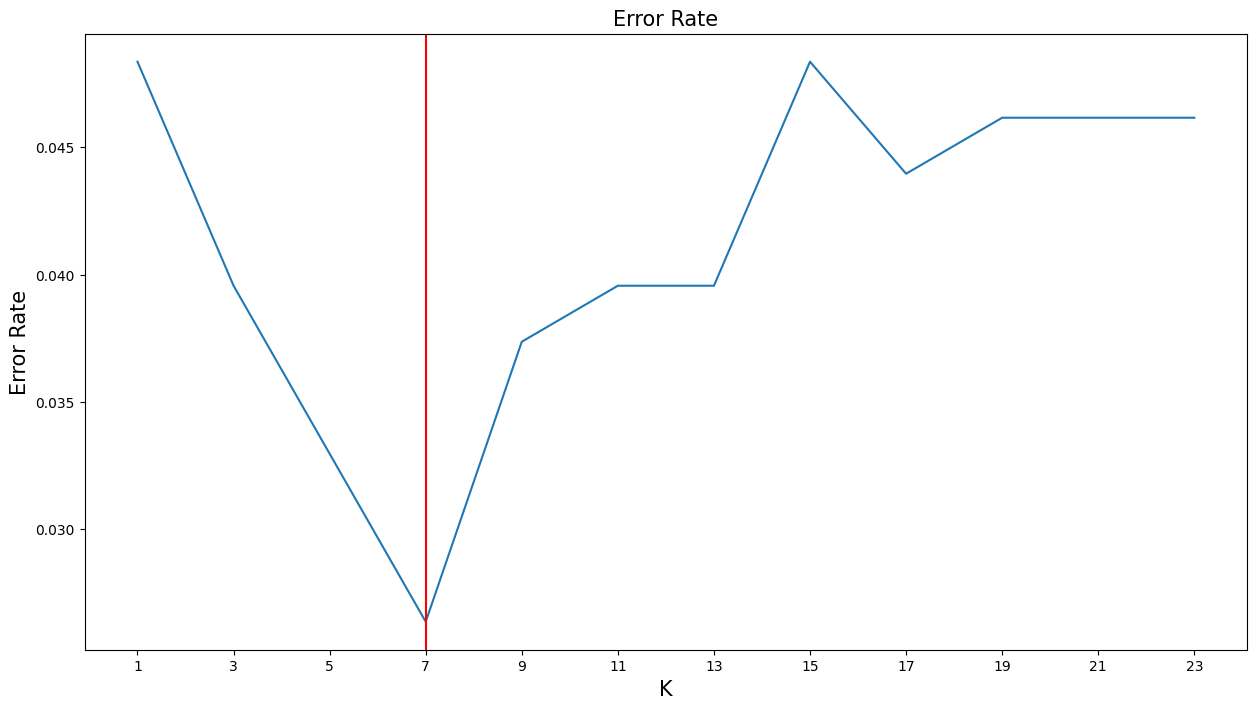

In [ ]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, xtrain, ytrain, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 7) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [ ]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [ ]:
best_grid = knn_grid.best_estimator_

In [ ]:
ytest_predict = best_grid.predict(xtest)

In [ ]:
confusion_matrix(ytest,ytest_predict)

array([[75,  0],
       [ 0, 39]])

In [ ]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



**Plot the ROC curve.**

In [ ]:
ypred_prob_grd = best_grid.predict_proba(xtest)[:,1]

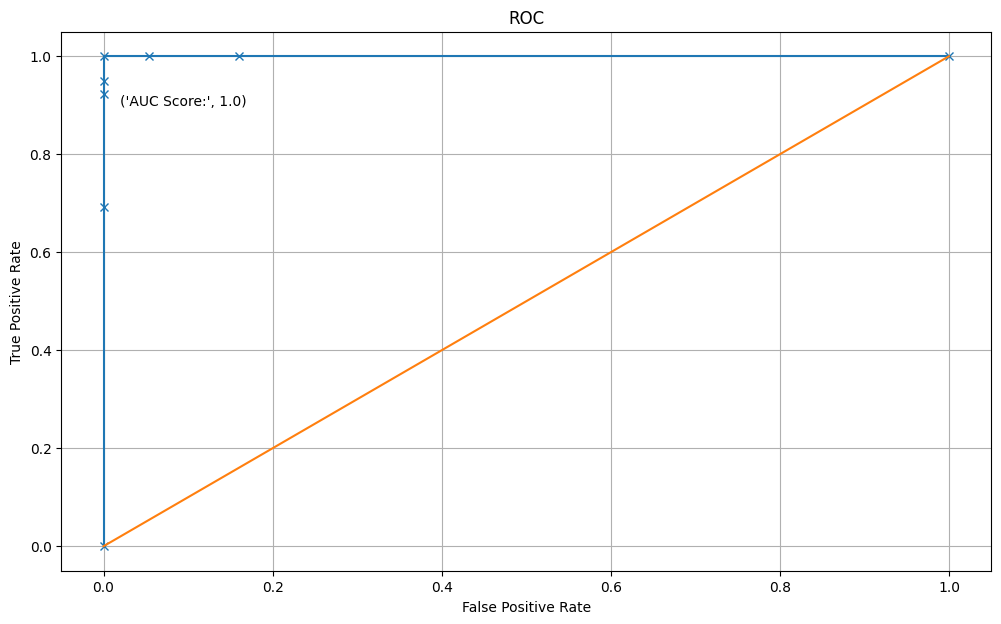

In [ ]:
#from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr,_=roc_curve(ytest,ypred_prob_grd)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='KNN with Grid Search')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred_prob_grd),4)))
plt.grid(True)
plt.show()

**Interpretation:** From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the red dotted line (i.e on the axes); with the AUC score 1.0.

<a id="NB"></a>
# 4. Naive Bayes Algorithm

It uses a `Bayes' Theorem` with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as `GaussianNB`, `MultinomialNB` and so on. 

#### Build a naive bayes model on a training dataset.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(xtrain, ytrain)

#### Build a confusion matrix.

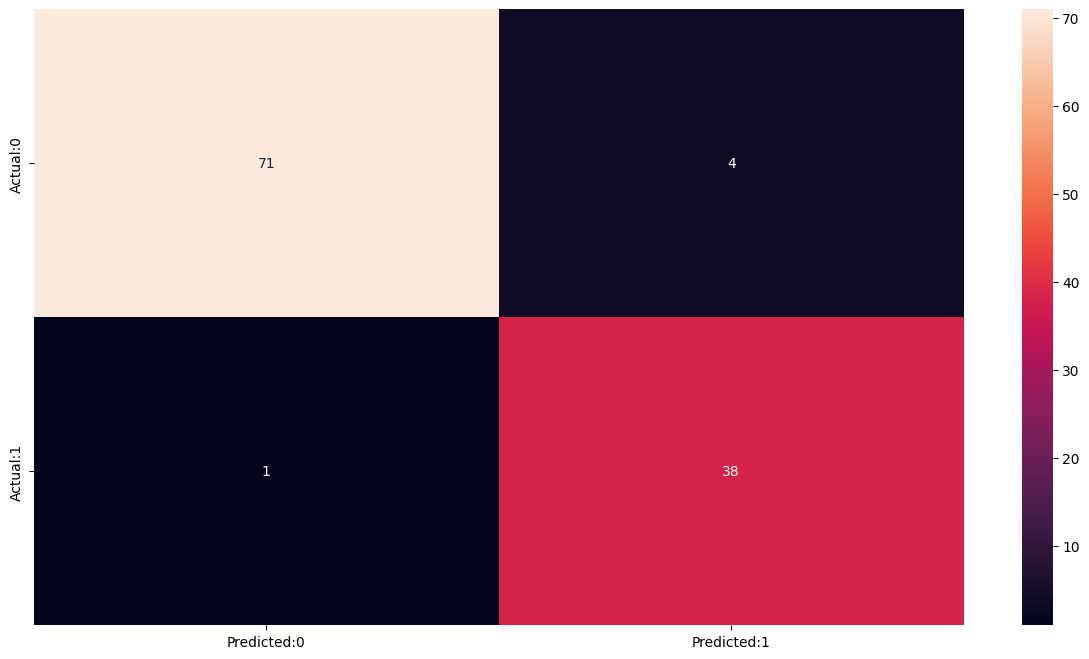

In [ ]:
# predict the target values using X_test
ypred = gnb_model.predict(xtest)

confusion_matrix(ytest,ypred)

cm=confusion_matrix(ytest,ypred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

**Calculate performance measures on the test set.**

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



**Plot the ROC curve.**

In [ ]:
ypred_prob = gnb_model.predict_proba(xtest)[:,1]

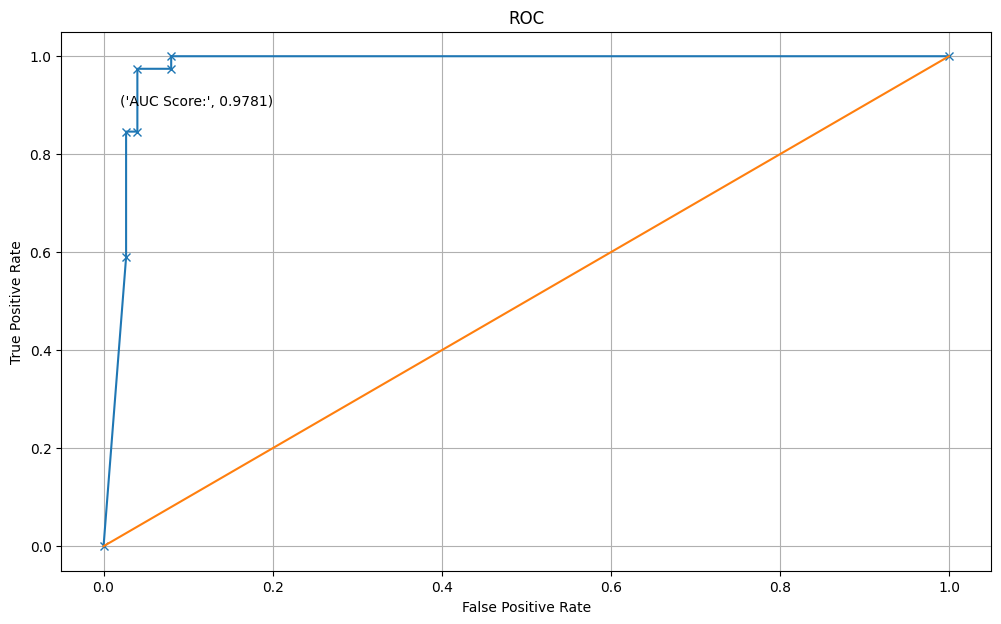

In [ ]:
#from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr,_=roc_curve(ytest,ypred_prob)

plt.figure(figsize=(12,7))
plt.plot(fpr,tpr, marker='x', label='KNN with Grid Search')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(ytest, ypred_prob),4)))
plt.grid(True)
plt.show()

**Interpretation:** From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.9781.

**Note:** Algorithms like Naive Bayes and tree based algorithms do not need feature scaling or normalization. Performing a features scaling in these algorithms may not have much effect.

<a id="compare"></a>
# 5. Comparison between KNN Model and Naive Bayes Model

In [ ]:
y_pred_prob_knn = knn_grid.predict_proba(xtest)[:,1]

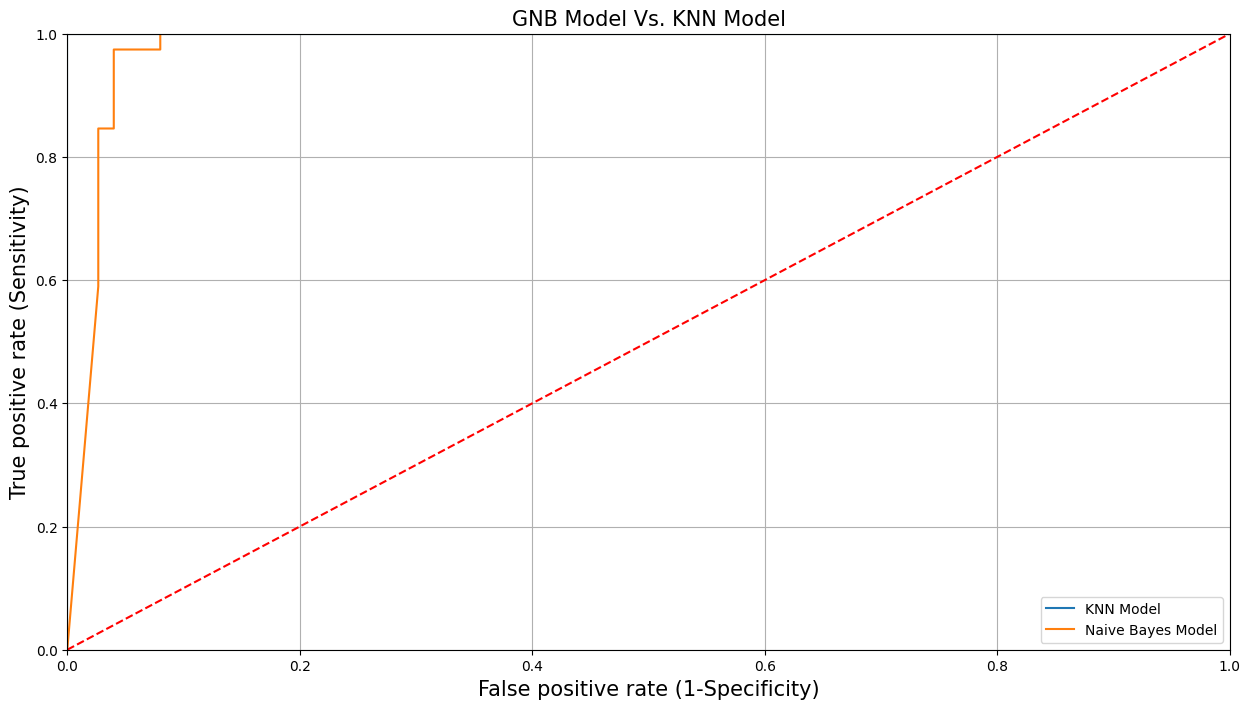

In [ ]:
# KNN

ypred_prob_knn = knn_grid.predict_proba(xtest)[:,1]

fpr, tpr, thresholds = roc_curve(ytest, ypred_prob_knn)

auc_score_knn = roc_auc_score(ytest, ypred_prob_knn)

plt.plot(fpr, tpr, label='KNN Model')



# Gaussian Naive Bayes
ypred_prob_gnb = gnb_model.predict_proba(xtest)[:,1]
    
fpr, tpr, thresholds = roc_curve(ytest, ypred_prob_gnb)

auc_score_gnb = roc_auc_score(ytest, ypred_prob_gnb)

# plot the ROC curve
plt.plot(fpr, tpr,label='Naive Bayes Model')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# set the position of legend
plt.legend(loc = 'lower right')

# plot the grid
plt.grid(True)



**Interpretation:** The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.